In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [4]:
#lets import the data set
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
#Lets Check the shape of the dataset
df.shape

(7752, 25)

In [6]:
#Lets Check the coulumns name
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
#lets chcek the datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
#Lets Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Observation:

1. 7752 row with 25 fetaures.

2. Only Date is object type, all others are float and need to be converted later accoding to fetures value.

3. Missing value present in many features.

In [9]:
#lets check the null vales without usig visualisation
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Remarks:
    
1. Here we can see in above dataset there are null values in many features.

2. 75 null values in many features so check the row number is common or not for 75 null value if row or index number is common for all fetures trhan drop the null vale.

3. Null value is mot more for other feture comaprion to index number 7752 so drop the null value in others fetures also.

<AxesSubplot:>

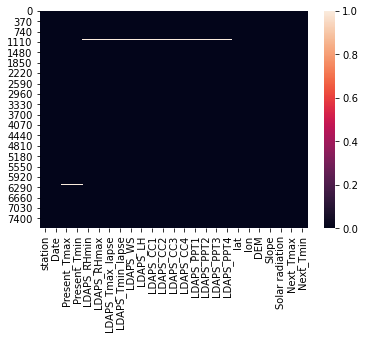

In [10]:
#lets check whether the null values are present in the dataset or not using heatmap
sns.heatmap(df.isnull())

In [11]:
#Lets check all null values in the rows wise Find null Values
for I in df.columns:
    print(df[df[I].isna()])

      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]
      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283 

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  10-08-2013          27.1          24.5          NaN   
1026      2.0  10-08-2013          29.7          25.4          NaN   
1027      3.0  10-08-2013          29.1          25.9          NaN   
1028      4.0  10-08-2013          30.8          27.3          NaN   
1029      5.0  10-08-2013          29.7          25.7          NaN   
...       ...         ...           ...           ...          ...   
5945     21.0  20-08-2016          34.1          27.9          NaN   
5946     22.0  20-08-2016          34.3          27.7          NaN   
5947     23.0  20-08-2016          34.6          28.7          NaN   
5948     24.0  20-08-2016          35.0          28.6          NaN   
5949     25.0  20-08-2016          35.2          28.1          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       NaN   
1026 

Observations:

Null value index is common for maximum features. So drop all the null values.

In [12]:
# Let's drop null values
print('Initial Shape ::', df.shape)
df.dropna(axis=0, how='any', inplace=True)
print('Final Shape ::', df.shape)

Initial Shape :: (7752, 25)
Final Shape :: (7588, 25)


In [13]:
#After drop null value check null value
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

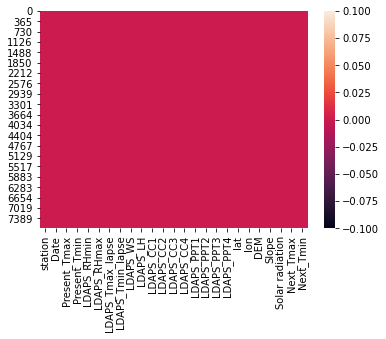

In [14]:
sns.heatmap(df.isnull())
plt.show()

# Summary Statistics

In [15]:
#lets check the statitic of numerical variable
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Observation:

1. In some features median is geater than mean.

2. If mean is greater than median means than right skewed and when median is more than mean than fetures data is left skewed.

3. difference between 75% and 100% in some fetaue varey lagre means outliers present in some features.

# Correlation

In [16]:
#Lets chcek the correaltion matrix
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

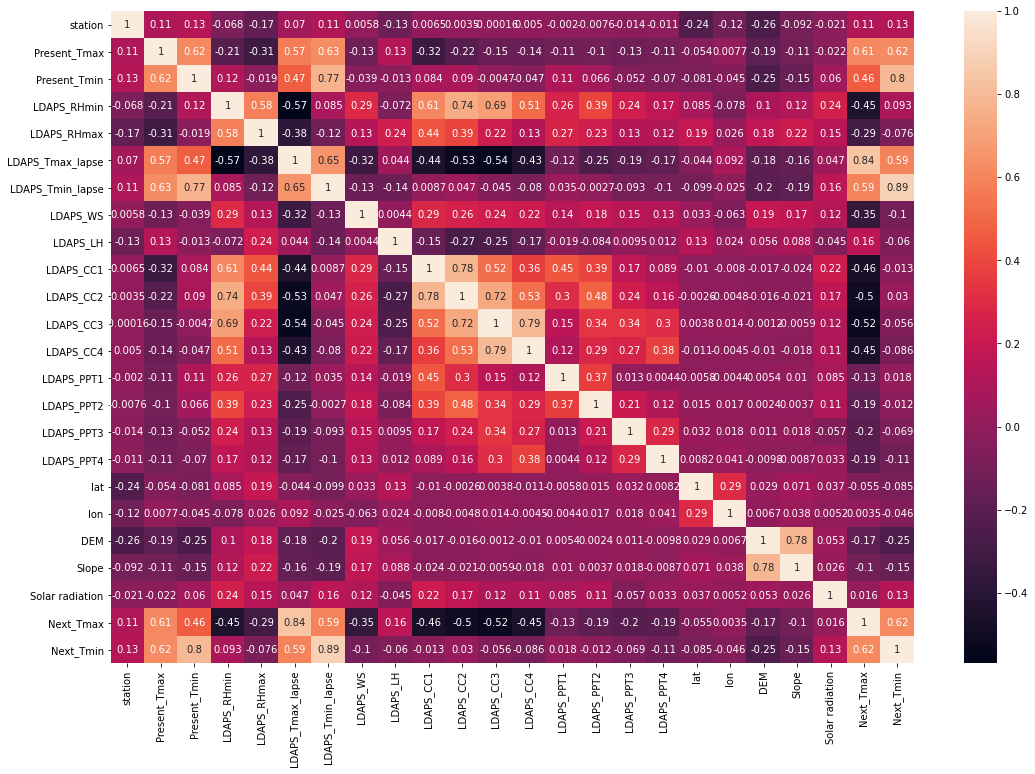

In [17]:
#Lets chcek the correaltion matrix using heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

In [18]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Others >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 25
>>> Number of Categorical Features :: 1
>>> Number of Numerical Features :: 24


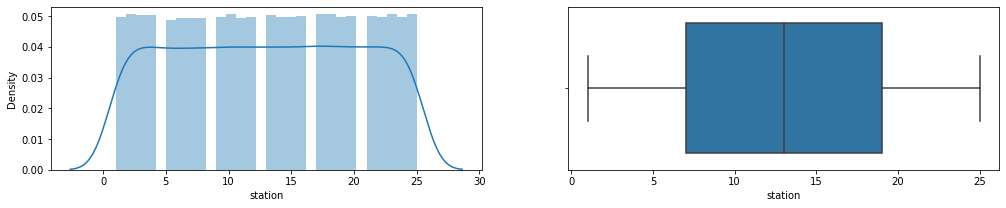

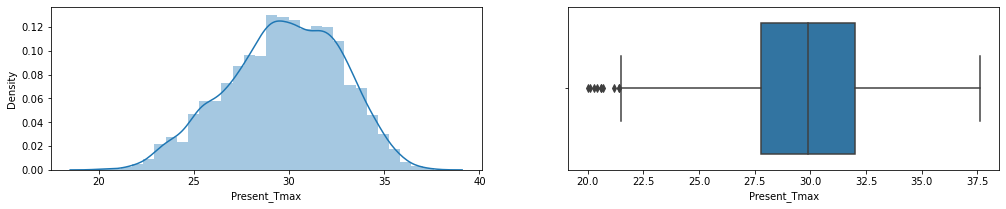

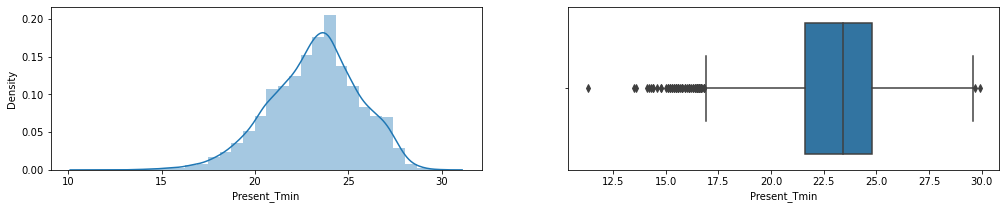

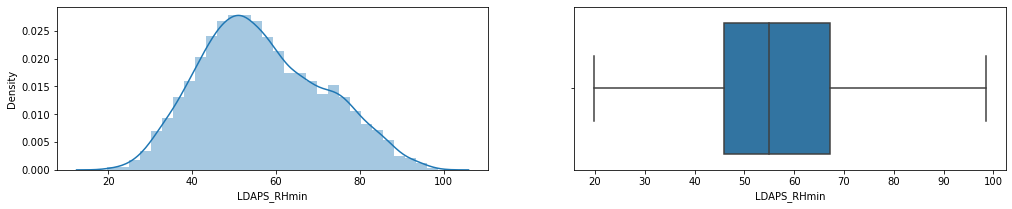

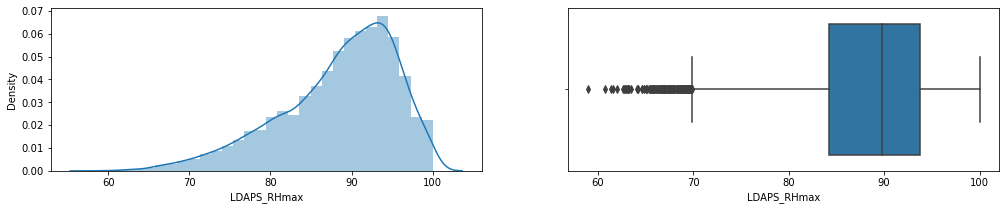

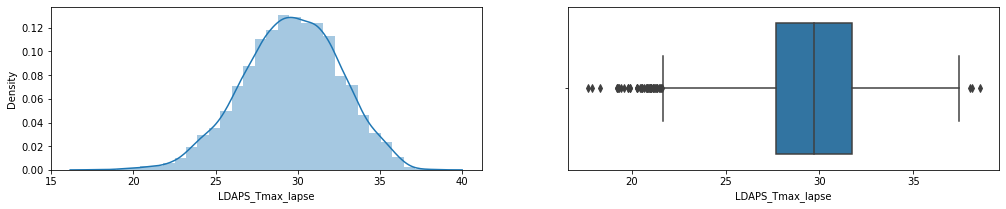

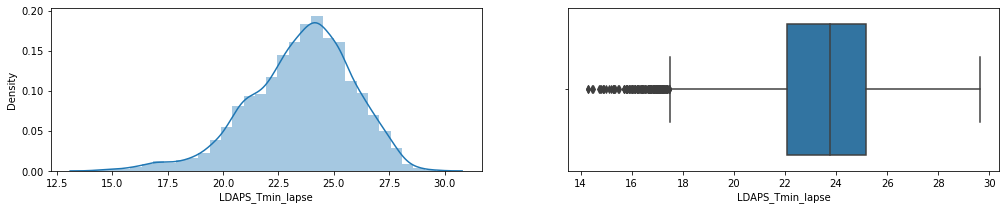

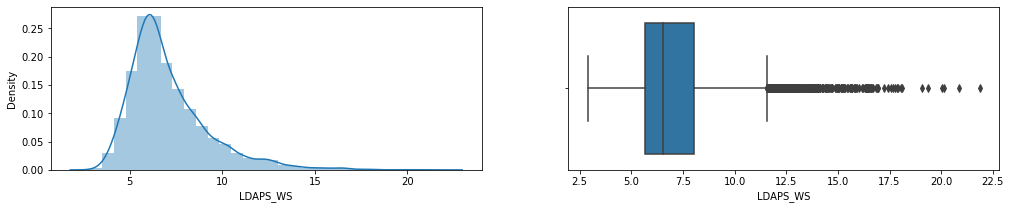

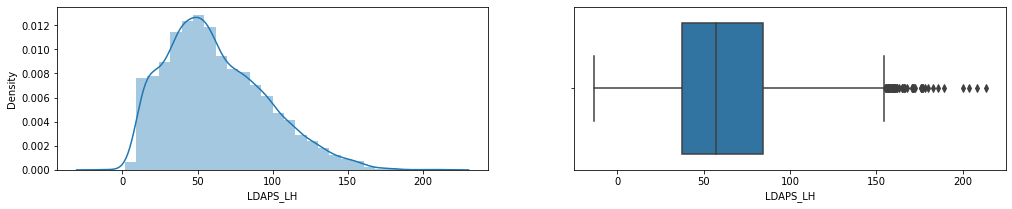

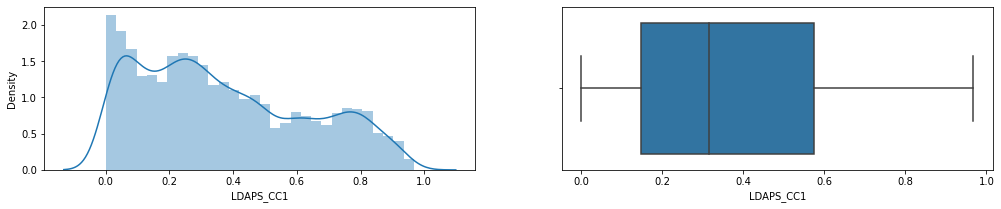

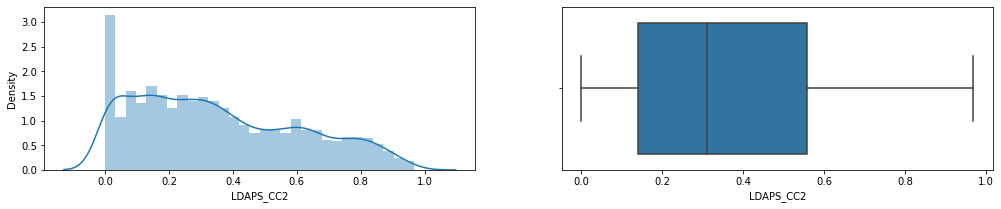

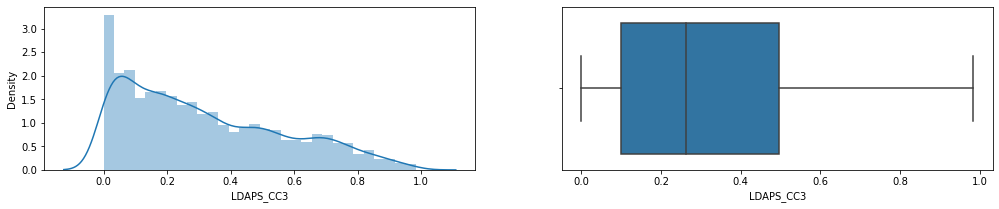

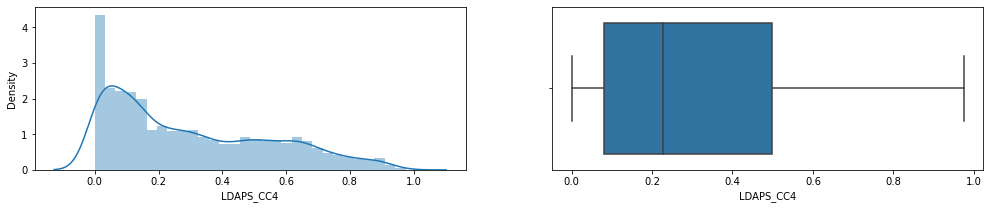

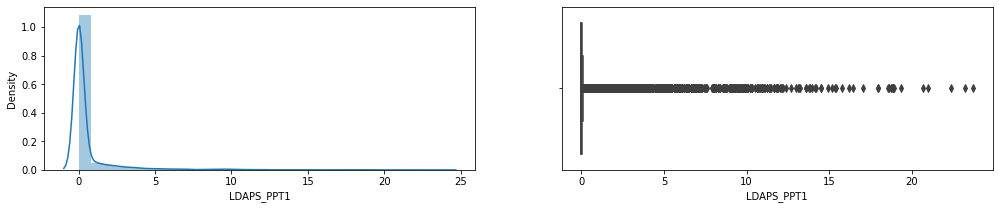

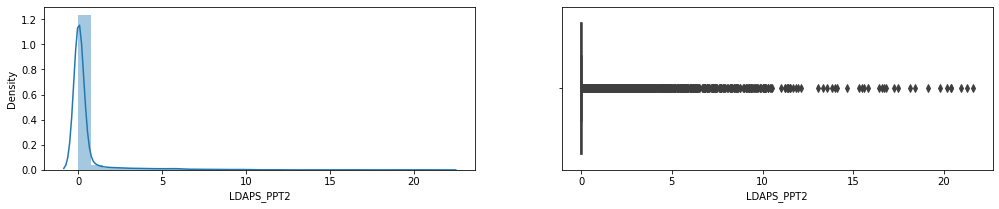

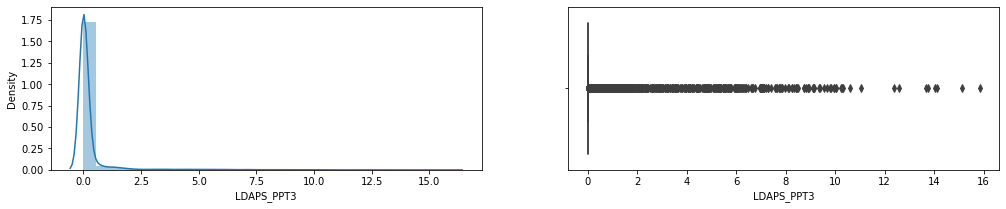

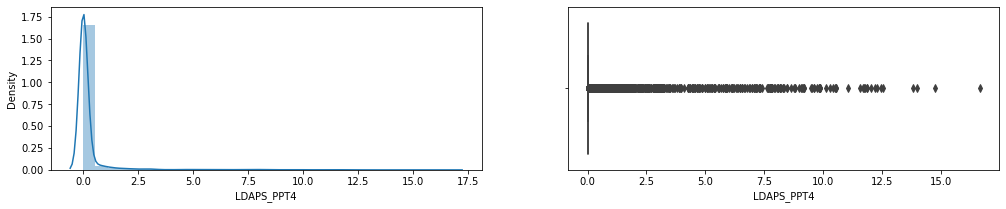

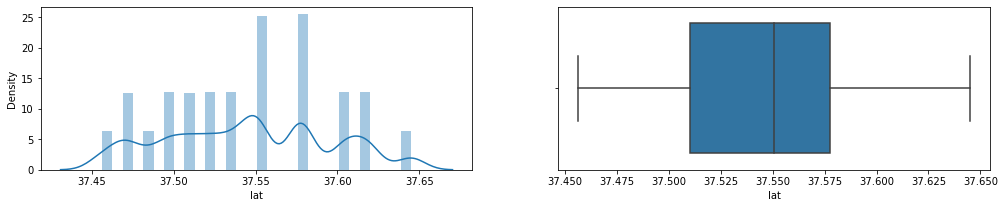

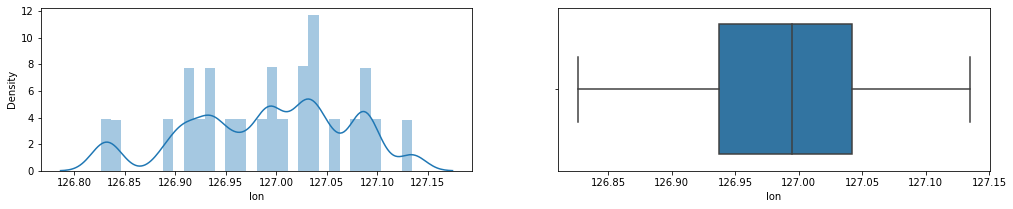

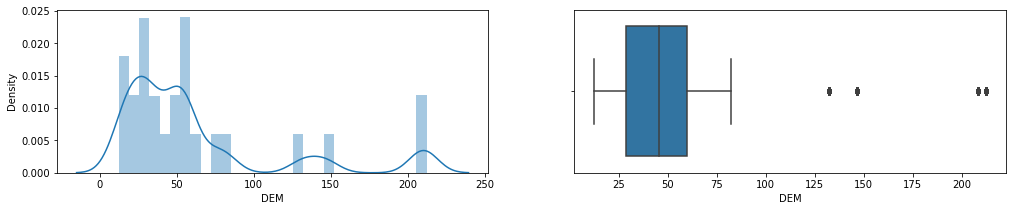

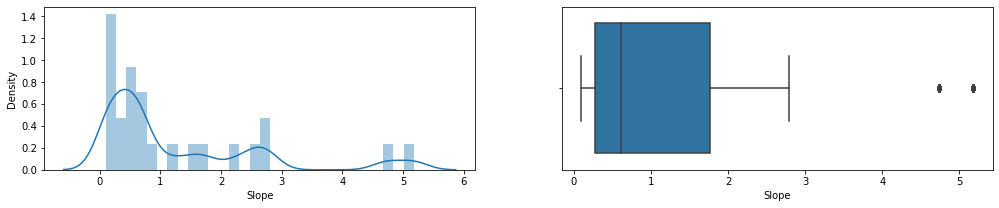

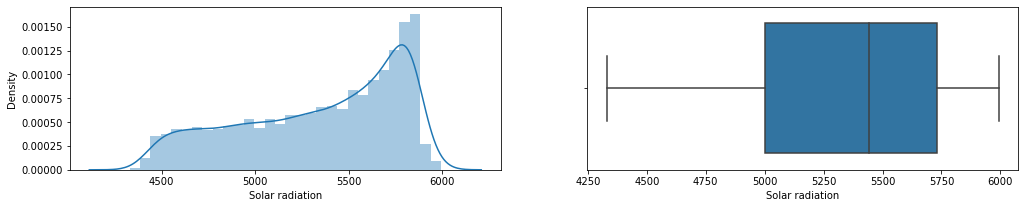

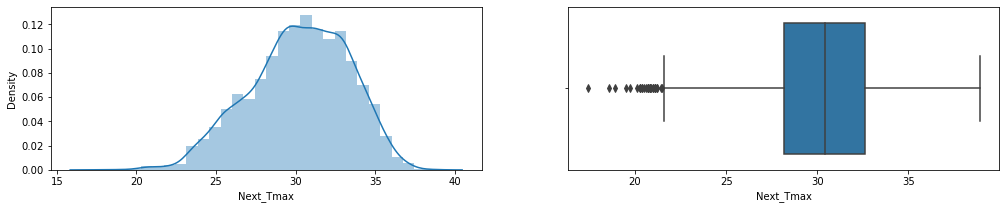

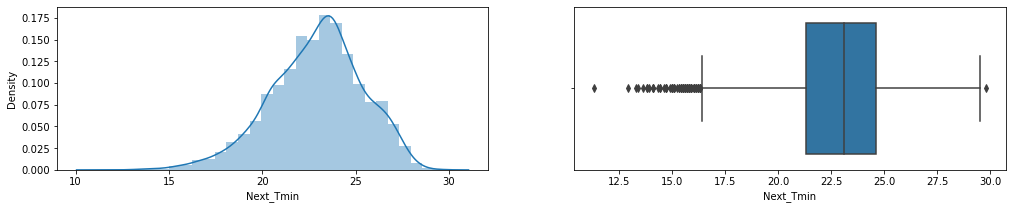

In [19]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

In [20]:
#Lets drop Date as it will not affect outcome
df.drop(columns=['Date'], axis=1, inplace=True)

In [21]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


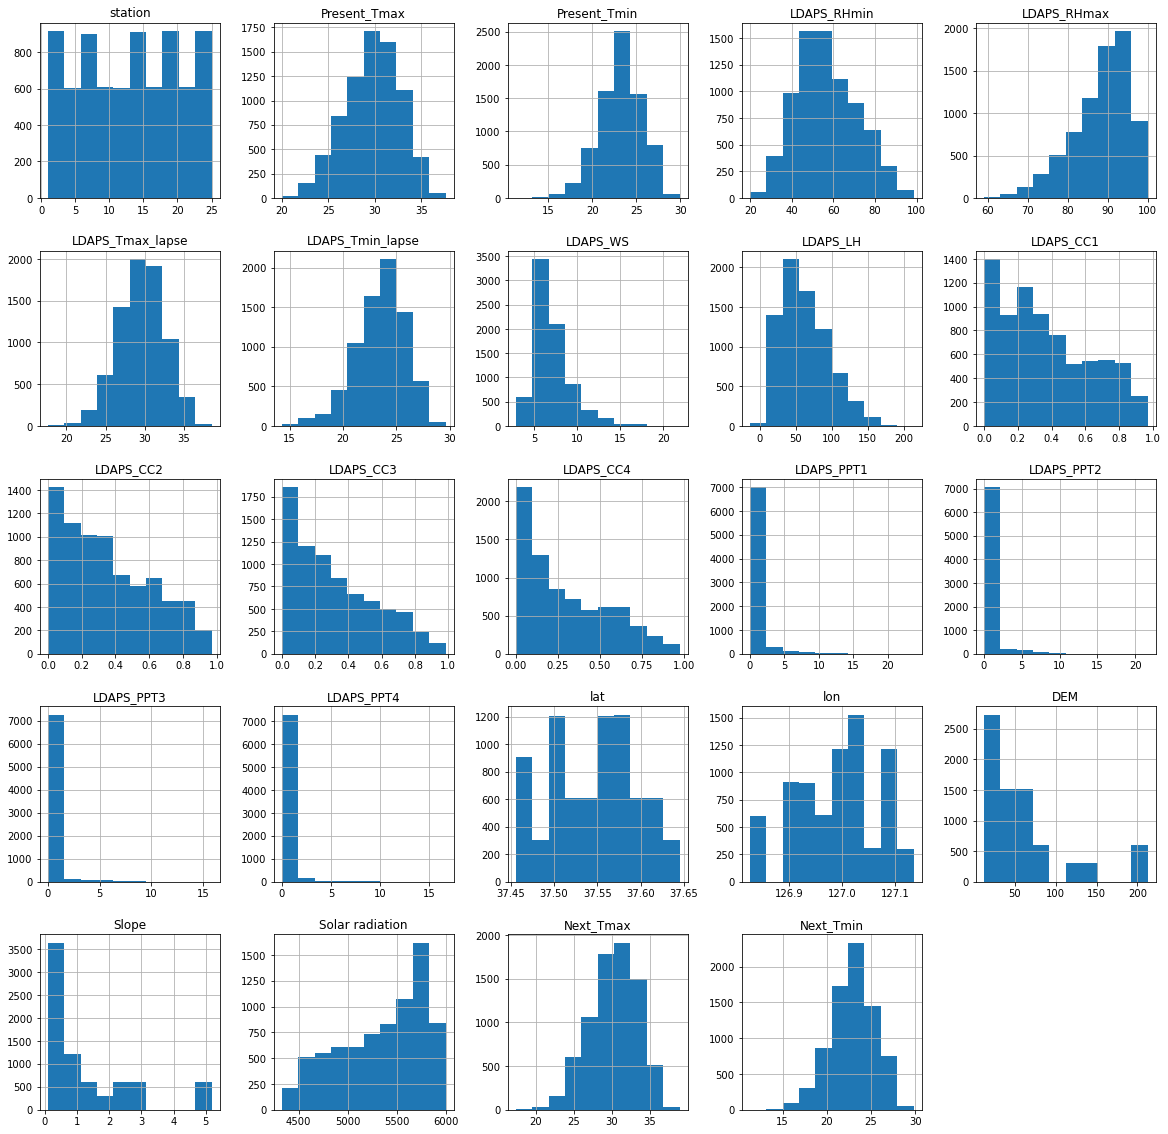

In [22]:
df.hist(figsize=(20,20))
plt.show()

# Checking Skewness

In [23]:
#lets hcek skewnesss of the dataset
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [24]:
#lets chcek the how many features ae skewed 
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Total count of numeric features:  24
count of features which are significantly skewed:  13


Remarks:

1. Out of 24 Features 13 features are skewed.

2. Skewness are not removed because if the skewness is removed than some features vaues nan.

3. If any features store nan vaue than outliers not detect and all row are 0 so not remove skewness.

# Removing Outliers

In [25]:
df.shape

(7588, 24)

In [26]:
#seprate the categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 [] 
num_df >>> 
 ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.17321212, 2.28923218, ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.20691387, 2.41419461, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

In [28]:
#consider threshold = 3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [29]:
df=df[(z<3).all(axis=1)]

In [30]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [31]:
df.shape

(6739, 24)

# Machine Learning Algorithm

In [32]:
#Splitting the data into input and output variable.
x=df.drop(columns=['Next_Tmax', 'Next_Tmin'], axis=1)
y=pd.concat([df['Next_Tmax'], df['Next_Tmin']], axis=1)

In [33]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(6739, 22) 		 (6739, 2)


In [34]:
#Scaling in input variables
ss=StandardScaler()
x=ss.fit_transform(x)

In [35]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (5391, 22) | x_test.shape --> (1348, 22) 
y_train.shape --> (5391, 2) | y_test.shape --> (1348, 2)


In [36]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [37]:
#Creating function for Model Training
from sklearn.metrics import mean_squared_error, r2_score
def models(model, x_train, x_test, y_train, y_test,score,rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score:',r2_score(y_test, y_pred))

In [38]:
model_name,score,rmse=[],[],[]

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='Linear Regression'
print('Model Report for', mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Linear Regression
Score: 0.7940819422476487
RMSE: 1.2497641649327016
R2 Score: 0.7859425953411777


# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
parameters={'alpha':[0.01,1,100]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [41]:
rr=Ridge(alpha=1)
mod='Ridge Regression'
print('Model Report for', mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Ridge Regression
Score: 0.7940818796216516
RMSE: 1.2497703905806556
R2 Score: 0.7859397640267137


# Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,0.01,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.001}

In [43]:
lr=Lasso(alpha=0.001)
mod='Lasso Regression'
print('Model Report for', mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Lasso Regression
Score: 0.7940746250347714
RMSE: 1.2493946094218953
R2 Score: 0.7860609798920943


# ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
mod='Elastic Net'
print('Model Report for', mod)
models(enr,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Elastic Net
Score: 0.7940791232266932
RMSE: 1.2495934385149075
R2 Score: 0.7859953309227539


# Kneighbors Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
mod='Kneighbors Regression'
print('Model report for', mod)
models(knr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Kneighbors Regression
Score: 0.8946954846854716
RMSE: 1.0713739480211928
R2 Score: 0.8414695096918672


# Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [47]:
dct=DecisionTreeRegressor(max_depth=10,min_samples_leaf=100)
mod='Decision Tree Regression'
print('Model Report for', mod)
models(dct,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Decision Tree Regression
Score: 0.7438905711969928
RMSE: 1.3968220499749395
R2 Score: 0.7277067625685623


# Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [49]:
rf=RandomForestRegressor(n_estimators=200,max_depth=6)
mod='Random Forest Regression'
print('Model Report for', mod)
models(rf,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Random Forest Regression
Score: 0.8210140333440232
RMSE: 1.2086023936406198
R2 Score: 0.7950374904562089


In [50]:
#ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=10,random_state=42)
mod='Extra Trees Regressor'
print('Model Report for',mod)
models(etr,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Extra Trees Regressor
Score: 1.0
RMSE: 0.8921225897451146
R2 Score: 0.8881664305024577


In [51]:
#Lets all model score store in table 
final=pd.DataFrame({'Model Name':model_name,'Score':score,'RMSE':rmse})
final

,Model Name,Score,RMSE
0,Linear Regression,0.794082,1.249764
1,Ridge Regression,0.794082,1.249770
2,Lasso Regression,0.794075,1.249395
3,Elastic Net,0.794079,1.249593
4,Kneighbors Regression,0.894695,1.071374
5,Decision Tree Regression,0.743891,1.396822
6,Random Forest Regression,0.821014,1.208602
7,Extra Trees Regressor,1.000000,0.892123


In [52]:
# Cross Validate All Algorithm by using for loop

model=[LinearRegression(),Ridge(alpha=1),Lasso(alpha=0.001),ElasticNet(alpha=0.001),KNeighborsRegressor(),DecisionTreeRegressor(max_depth=15,min_samples_leaf=100),
       RandomForestRegressor(n_estimators=300,max_depth=6),ExtraTreesRegressor(n_estimators=10,random_state=42)]


for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.60830017 0.58879918 0.7797166  0.63563626 0.59872221 0.63145982
 0.73067985 0.55407078 0.67817723 0.76634204 0.55300723 0.7905984
 0.74564999 0.59080032 0.71728631]
Mean Score: 0.6646164258995617
Standard deviation: 0.08111031102602155
************************************************************************************************


Model: Ridge(alpha=1)
Score: [0.60835978 0.58888392 0.77978016 0.63566863 0.59867942 0.63149085
 0.73062199 0.55405407 0.67818153 0.76632635 0.55309225 0.79064121
 0.74570741 0.59081922 0.71725799]
Mean Score: 0.6646376513634666
Standard deviation: 0.08110419485041921
************************************************************************************************


Model: Lasso(alpha=0.001)
Score: [0.6085171  0.58945505 0.77978675 0.63534779 0.59825033 0.63226781
 0.73060841 0.55528857 0.6788952  0.76638275 0.55351949 0.7907701
 0.74606014 0.59150354 0.71744001]
Mean Score: 0.6649395367463208
Standard deviation: 0.0809364

In [53]:
#Linear SVR with the MultiOutputRegressor wrapper for multioutput regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define model
model = LinearSVR()
wrapper = MultiOutputRegressor(model)
# fit model
wrapper.fit(x_train,y_train)
wrapper.score(x_train,y_train)
pred_y=wrapper.predict(x_test)
print('Score of',m,'is:',score)
print('MAE:',mean_absolute_error(y_test,pred_y))
print('MSE:',mean_squared_error(y_test,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_y)))
print('R2_score:',r2_score(y_test,pred_y))

Score of ExtraTreesRegressor(n_estimators=10, random_state=42) is: [0.4314842  0.56544319 0.68701659 0.64719747 0.5934444  0.44606725
 0.65070875 0.3951312  0.64281909 0.70455387 0.50757387 0.77732967
 0.75051931 0.53488891 0.61574028]
MAE: 0.9500198109026841
MSE: 1.583192147155351
RMSE: 1.2582496362627533
R2_score: 0.782868780210429


In [54]:
LR=LinearRegression()
Ridge=Ridge(alpha=1,random_state=42)
Lasso=Lasso(alpha=0.001,random_state=42)
ElasticNet=ElasticNet(alpha=0.001,random_state=42)
KNR=KNeighborsRegressor(algorithm='auto',n_neighbors=15,weights='uniform')
DTR=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100, random_state=42)
RFR=RandomForestRegressor(n_estimators=300,max_depth=6)
ETR=ExtraTreesRegressor(n_estimators=10,random_state=42)

In [55]:
models=[]
models.append(('LinearTrgression',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighborsRegressor',KNR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('ExtraTreesRegressor',ETR))

In [56]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score * 100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    #R2_score
    r_score=r2_score(y_test,pred)
    print('R2_score:',r_score)
    R2_Score.append(r_score * 100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val * 100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')

****************** LinearTrgression *****************************


LinearRegression()
Score: 0.7940819422476487




R2_score: 0.7859425953411777


Cross Val Score: 0.6646164258995617


MAE: 0.9542528264066783


MSE: 1.5619104679499327


RMSE: 1.2497641649327016



****************** Ridge *****************************


Ridge(alpha=1, random_state=42)
Score: 0.7940818796216516




R2_score: 0.7859397640267137


Cross Val Score: 0.6646376513634666


MAE: 0.9542472642809843


MSE: 1.5619260291721244


RMSE: 1.2497703905806556



****************** Lasso *****************************


Lasso(alpha=0.001, random_state=42)
Score: 0.7940746250347714




R2_score: 0.7860609798920943


Cross Val Score: 0.6649395367463208


MAE: 0.9537896300334738


MSE: 1.5609868900524901


RMSE: 1.2493946094218953



****************** ElasticNet *****************************


ElasticNet(alpha=0.001, random_state=42)
Score: 0.7940791232266932




R2_score: 0.7859953309227539


Cross Val Score: 0.66484831791

In [57]:
#Lets Store result in a dataframe 
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearTrgression,79.408194,78.594260,66.461643,0.954253,1.561910,1.249764
1,Ridge,79.408188,78.593976,66.463765,0.954247,1.561926,1.249770
2,Lasso,79.407463,78.606098,66.493954,0.953790,1.560987,1.249395
3,ElasticNet,79.407912,78.599533,66.484832,0.954009,1.561484,1.249593
4,KNeighborsRegressor,84.746049,81.976031,52.166160,0.873539,1.303226,1.141589
5,DecisionTreeRegressor,74.389057,72.770676,51.417184,1.088638,1.951112,1.396822
6,RandomForestRegressor,82.125454,79.619863,59.359532,0.942854,1.451817,1.204914
7,ExtraTreesRegressor,100.000000,88.816643,59.666120,0.671766,0.795883,0.892123


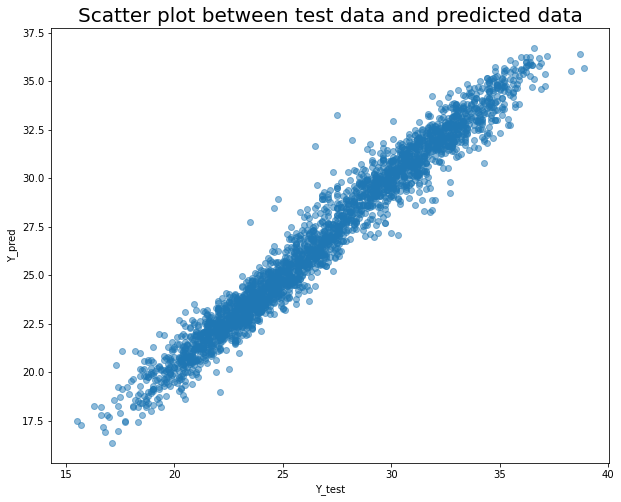

In [58]:
#Scatter plot between test data and prediction for ExtraTreesRegressor
plt.figure(figsize=(10,8))
plt.scatter(y_test, ETR.predict(x_test), alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=20)
plt.show()

# Saving The Best Model

In [69]:
import pickle
# open a file, where to store the data
file = open('flight_KNR.pkl','wb')

#dump information to that file
pickle.dump(KNR,file)